<a href="https://colab.research.google.com/github/jhj1819/Machine-learning/blob/main/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header=None) # 헤더가 있는지 없는지 먼저 확인해야함.
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

In [ ]:
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


> 4개의 칼럼과 종이 나와있음
- 같은 종끼리 데이터가 몰려있음

결측치 확인하기

In [ ]:
df.info() ## df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


> 결측치 없음

x(특성행렬)와 y(타겟) 나누기

In [ ]:
target =  df['species']

In [ ]:
target

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


target의 종류별 개수 (series에서 가능)

In [ ]:
target.value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
features = df.drop('species', axis=1) #pandas DataFrame

LabelEncoder를 이용해서 범주값을 정수값으로 바꿔죽

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(target)
target_encoded ## 넘파이 배열로 0, 1, 2로 인코딩됨

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

sklearn에서는 넘파이배열이나 판다스를 다룸..  


target_encoded가 이미 넘파이이므로, 그대로 y값으로 쓴다.

In [ ]:
y = target_encoded

In [ ]:
X = features.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

특성이 4개이지만 로지스틱회귀 이해를 위해 2개만 사용.(0,2번칼럼)

In [ ]:
X = X[:, [0, 2]]

In [ ]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

훈련/테스트 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1)

y_train과 y_test에 품종이 각각 어떻게 들어있는지 확인해보자..

In [ ]:
np.bincount(y_train)

array([36, 32, 37])

In [ ]:
np.bincount(y_test)

array([14, 18, 13])

stratify:y

훈련/테스트 타겟의 값의 분포가 y와 같게

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1, stratify = y)

In [ ]:
np.bincount(y_train)

array([35, 35, 35])

In [ ]:
np.bincount(y_test)

array([15, 15, 15])

데이터 시각화.

데이터를 타겟이 0, 1, 2 인것 분할

In [ ]:
y_train ==0

array([ True,  True, False, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True, False,  True,  True,  True])

True인 값들에 대한 인덱스만 뽑아내면 타겟 0인것을 가져올 수 있음

In [ ]:
X0 = X_train[y_train==0]
X1 = X_train[y_train==1]
X2 = X_train[y_train==2]

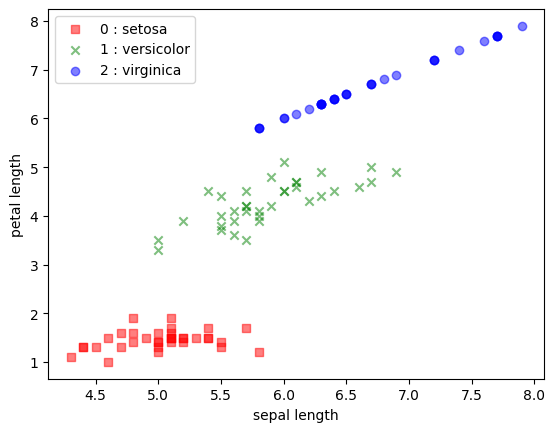

In [ ]:
plt.scatter(X0[:,0], X0[:,1], alpha = 0.5, marker = 's', c='r', label='0 : setosa') # alpha : 투명도
plt.scatter(X1[:,0], X1[:,1], alpha = 0.5, marker = 'x', c='g', label='1 : versicolor')
plt.scatter(X2[:,0], X2[:,0], alpha = 0.5, marker = 'o', c='b', label = '2 : virginica')

plt.xlabel('sepal length') # 꽃받침 길이
plt.ylabel('petal length') # 꽃잎 길이
plt.legend();


#### 특성 스케일 조정
---
꽃받침과 꽃잎의 스케일이 다르므로 조정 필요

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test) # test는 fit 안함!!

# 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression(random_state=1) # 처음엔 default
logistic.fit(X_train_std, y_train) # 그냥 X_train이 아닌 X_train_std를 넣어야함

LogisticRegression(random_state=1)

예측

In [ ]:
y_pred = logistic.predict(X_test_std[:3, :])
y_pred

array([2, 0, 0])

실제값

array([2, 0, 0])

클래스별 확률 예측

In [ ]:
np.round(logistic.predict_proba(X_test_std[:3,:]),2)

array([[0.  , 0.31, 0.69],
       [0.87, 0.13, 0.  ],
       [0.96, 0.04, 0.  ]])

In [ ]:
y_pred = logistic.predict(X_test_std)
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0,
       0])

In [ ]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [ ]:
y_pred == y_test

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True])

In [ ]:
logistic.score(X_test_std, y_test)

0.8444444444444444

logistic.proba: 확률을 다 보여줌

In [ ]:
np.round(logistic.predict_proba(X_test_std)[:3,:],2)

array([[0.  , 0.31, 0.69],
       [0.87, 0.13, 0.  ],
       [0.96, 0.04, 0.  ]])

In [ ]:
new_data = np.array([6,4]) # 꽃받침 길이, 꽃잎 길

In [ ]:
new_data = np.array([[6,4]])



```
logistic.predict(new_data)
```
오류 이유.
1. predict 안에는 2차원이 들어가야함.. -> [[6,4]] 이렇게 대괄호 하나 더 붙여서 2차원으로 만든다.



In [ ]:
logistic.predict(new_data)

array([2])

2가 나왔지만, **표준화된 데이터가 아니므로 틀린값임**.

In [ ]:
new_data_std = scaler.transform(new_data)
new_data_std

array([[0.17204256, 0.11738784]])

In [ ]:
logistic.predict(new_data_std)

array([1])

In [ ]:
from mlxtend.plotting import plot_decision_regions

Text(0.5, 1.0, 'test data')

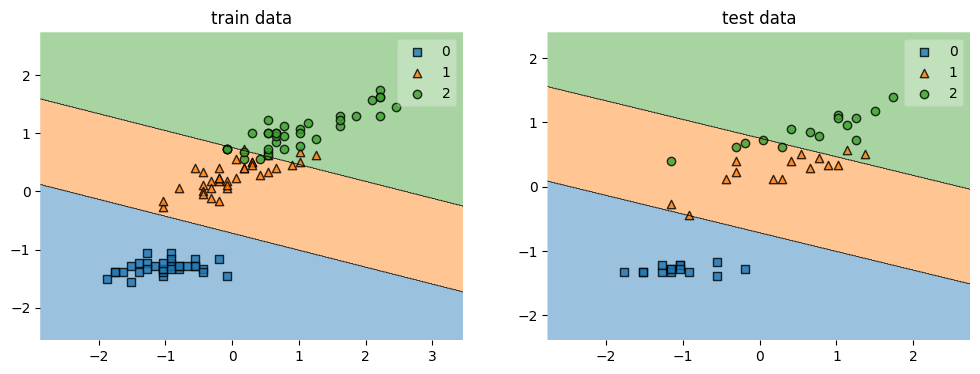

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) # (1,2)의 1자리에 넣는다.
plot_decision_regions(X_train_std, y_train, logistic) # 3번째 인자. 훈련시킨 모델.
plt.title("train data")
plt.subplot(1,2,2)
plot_decision_regions(X_test_std, y_test, logistic)
plt.title("test data")

In [ ]:
print(logistic.score(X_train_std, y_train))
print(logistic.score(X_test_std, y_test))

0.8952380952380953
0.8444444444444444


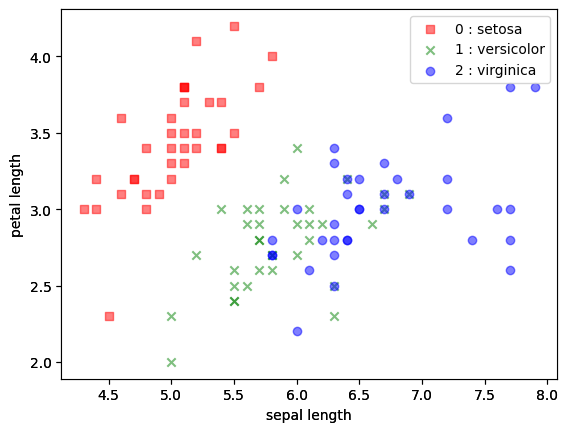

In [ ]:
d = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
target_encoded = target.map(lambda x: d[x]) #target.map(d)와 동일
X = features.to_numpy()
y = target_encoded.values
X.shape #(150, 4)
y.shape #(150, ) X = X[:, [0, 2]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
 random_state=1, stratify=y)
X_train.shape #(105, 2)
y_train.shape #(105, ) § train_size, test_size 인수 설정 : 비율 혹은 개수

np.bincount(y) #[50, 50, 50]
np.bincount(y_train) #[35, 35, 35]

X0 = X_train[y_train==0] #타겟이 0인 데이터만 추출
X1 = X_train[y_train==1] #타겟이 1인 데이터만 추출
X2 = X_train[y_train==2] #타겟이 2인 데이터만 추출

plt.scatter(X0[:, 0], X0[:,1], alpha = 0.5, marker = 's', c='r', label='0 : setosa')
plt.scatter(X1[:, 0], X1[:,1], alpha = 0.5, marker = 'x', c='g', label='1 : versicolor')
plt.scatter(X2[:, 0], X2[:,1], alpha = 0.5, marker = 'o', c='b', label='2 : virginica')
plt.xlabel('sepal length') #꽃받침 길이
plt.ylabel('petal length') #꽃잎 길이
plt.legend(); ax = plt.axes()
ax.scatter(X0[:, 0], X0[:,1], alpha = 0.5, marker = 's', c='r', label='0 : setosa')
ax.scatter(X1[:, 0], X1[:,1], alpha = 0.5, marker = 'x', c='g', label='1 : versicolor')
ax.scatter(X2[:, 0], X2[:,1], alpha = 0.5, marker = 'o', c='b', label='2 : virginica')
ax.set(xlabel='sepal length', ylabel='petal length')
ax.legend();

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1)
logistic.fit(X_train_std, y_train)

LogisticRegression(random_state=1)

In [ ]:
logistic.predict(X_test_std[:3, :]) #예측값 [2, 0, 0]
y_test[:3] #실제값 #[2, 0, 0]
np.round(logistic.predict_proba(X_test_std[:3, :]), 2)
logistic.predict_proba(X_test_std[:3, :]).argmax(axis=1) #[2, 0, 0]

array([2, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = logistic.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average='macro'))

[1.     0.9375 1.    ]
0.9791666666666666


In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].